In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

df = pd.DataFrame(lst_dct)
keys = cols 
df

,P,Q,X,Y,Z
0,22.998332,44.782741,135.238378,-43.807891,329.466008
1,24.510983,55.425326,172.822884,-56.590797,423.446552
2,23.403191,55.311359,164.187793,-52.490634,400.230316
3,26.914669,53.845267,155.255900,-49.577819,388.819232
4,25.938902,47.264389,149.630106,-45.144191,355.147576
...,...,...,...,...,...
99995,27.565781,46.396341,137.029968,-40.770745,356.034664
99996,29.803653,48.234010,137.763836,-50.096724,361.944480
99997,20.901129,51.739916,156.471363,-60.813949,396.602067
99998,24.165903,44.646304,129.268223,-46.002719,333.413897


<AxesSubplot:xlabel='Q', ylabel='Z'>

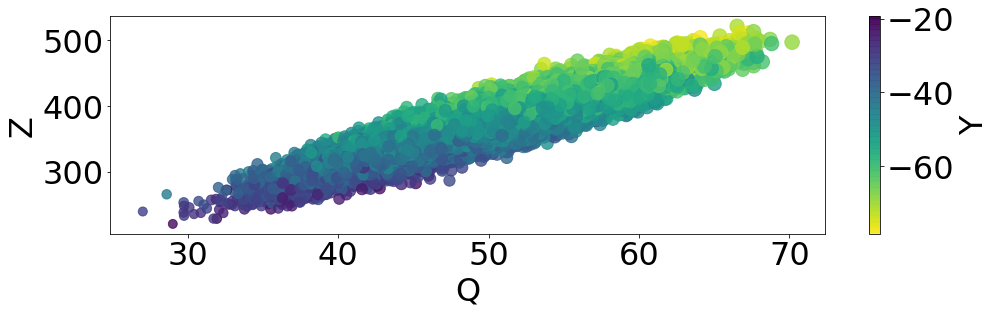

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (16,4))
df.plot.scatter(x = "Q", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [3]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.002638,-0.002930,0.003970,0.137990
Q,-0.002638,1.000000,0.948386,-0.704804,0.913812
X,-0.002930,0.948386,1.000000,-0.669041,0.934090
Y,0.003970,-0.704804,-0.669041,1.000000,-0.844639
Z,0.137990,0.913812,0.934090,-0.844639,1.000000


In [4]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [5]:
residuals

,P,Q,X,Y,Z
0,0.746320,-0.635137,3.515928,-2.613776,-7.043138
1,-0.743420,-1.391492,1.095429,0.563144,1.992447
2,-1.343753,1.219909,-1.534494,1.424677,2.152797
3,0.212018,2.450091,-3.293828,2.026294,2.945787
4,3.335651,-2.204563,7.716324,-4.167611,-11.503991
...,...,...,...,...,...
99995,-2.175086,0.770800,-7.011646,6.637257,13.786614
99996,3.522797,1.557652,-0.060954,-2.188026,-4.516232
99997,-1.662679,-0.995068,1.086343,-2.438901,-1.553055
99998,-0.215253,0.662230,-1.050280,-0.613654,-0.856172


In [6]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(3)

,P,Q,X,Y,Z
P,1.000,0.002,-0.588,0.633,0.707
Q,0.002,1.000,0.504,-0.135,-0.002
X,-0.588,0.504,1.000,0.743,0.832
Y,0.633,-0.135,0.743,1.000,-0.894
Z,0.707,-0.002,0.832,-0.894,1.000


In [7]:
!pip install pingouin --user

In [8]:
import pingouin
df.pcorr().round(3)

,P,Q,X,Y,Z
P,1.000,0.002,-0.588,0.633,0.707
Q,0.002,1.000,0.504,-0.135,-0.002
X,-0.588,0.504,1.000,0.743,0.832
Y,0.633,-0.135,0.743,1.000,-0.894
Z,0.707,-0.002,0.832,-0.894,1.000


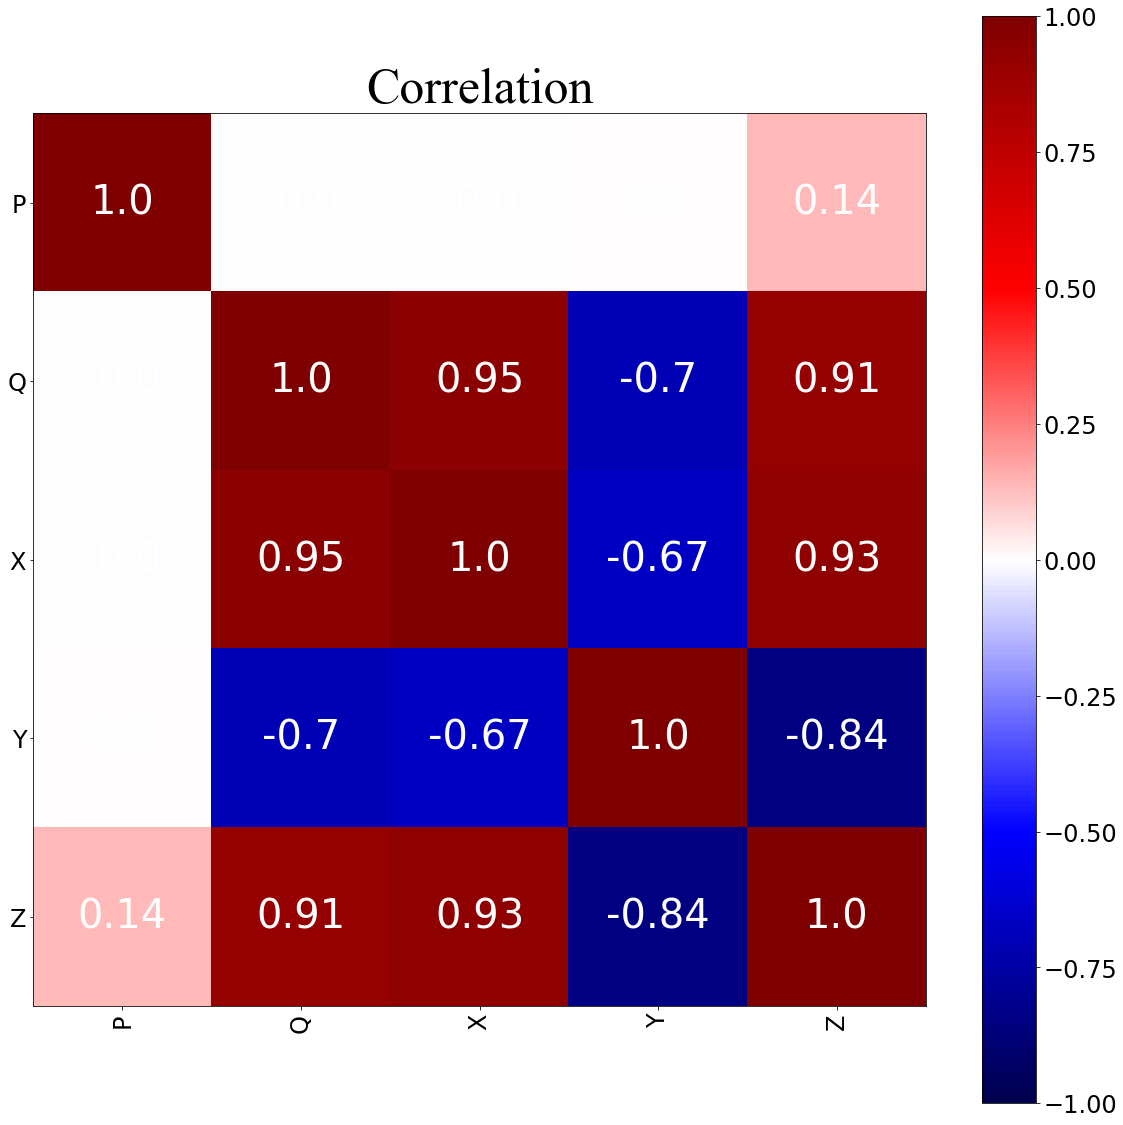

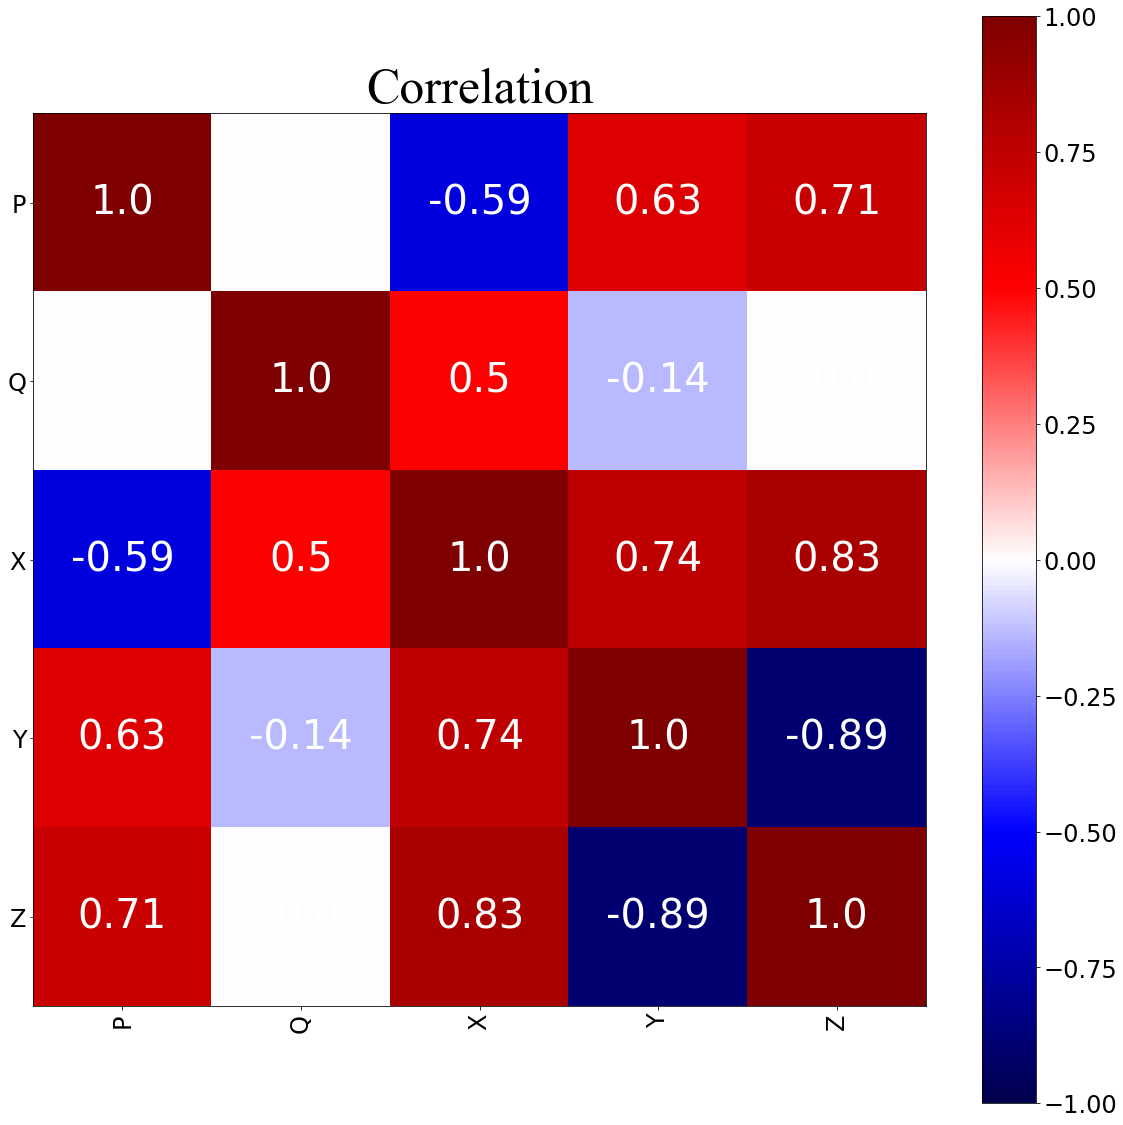

In [9]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                    save_fig = False,
                    pp = None)
corr_matrix_heatmap(df.pcorr(),
                    save_fig = False,
                    pp = None)

In [10]:
residuals

,P,Q,X,Y,Z
0,0.746320,-0.635137,3.515928,-2.613776,-7.043138
1,-0.743420,-1.391492,1.095429,0.563144,1.992447
2,-1.343753,1.219909,-1.534494,1.424677,2.152797
3,0.212018,2.450091,-3.293828,2.026294,2.945787
4,3.335651,-2.204563,7.716324,-4.167611,-11.503991
...,...,...,...,...,...
99995,-2.175086,0.770800,-7.011646,6.637257,13.786614
99996,3.522797,1.557652,-0.060954,-2.188026,-4.516232
99997,-1.662679,-0.995068,1.086343,-2.438901,-1.553055
99998,-0.215253,0.662230,-1.050280,-0.613654,-0.856172


In [11]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,P,Q,X,Y,Z
P,NaN,0.48,0.0,0.0,0.00
Q,0.48,NaN,0.0,0.0,0.56
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.56,0.0,0.0,NaN


In [12]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [13]:
import copy
import pingouin
p_val = .01
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        c_used = copy.copy(controls_used)
        for c_var in control_vars:
            if y not in undirected_graph[x]:
                break
            c_used.append(c_var)
            test = df.partial_corr(x = x, y = y, covar=c_used,
                                  method = "pearson")
            if test["p-val"].values[0] > p_val: 

                undirected_graph[x].remove(y)

                break
            else:
                remaining_controls = copy.copy(control_vars)
                remaining_controls.remove(c_var)

                check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
    d_sep = {}
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            d_sep[(x,y)] = []

            if x != y:

                test = df.partial_corr(x = x, y = y, covar = None,method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)

                else:

                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    print(edges, graph.__dict__)
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "orange",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='purple',
                                 font_size=20)
    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

[('P', 'Z'), ('Q', 'X'), ('Q', 'Y'), ('X', 'Z'), ('Y', 'Z')] {'graph_attr_dict_factory': <class 'dict'>, 'node_dict_factory': <class 'dict'>, 'node_attr_dict_factory': <class 'dict'>, 'adjlist_outer_dict_factory': <class 'dict'>, 'adjlist_inner_dict_factory': <class 'dict'>, 'edge_attr_dict_factory': <class 'dict'>, 'graph': {}, '_node': {}, '_adj': {}}


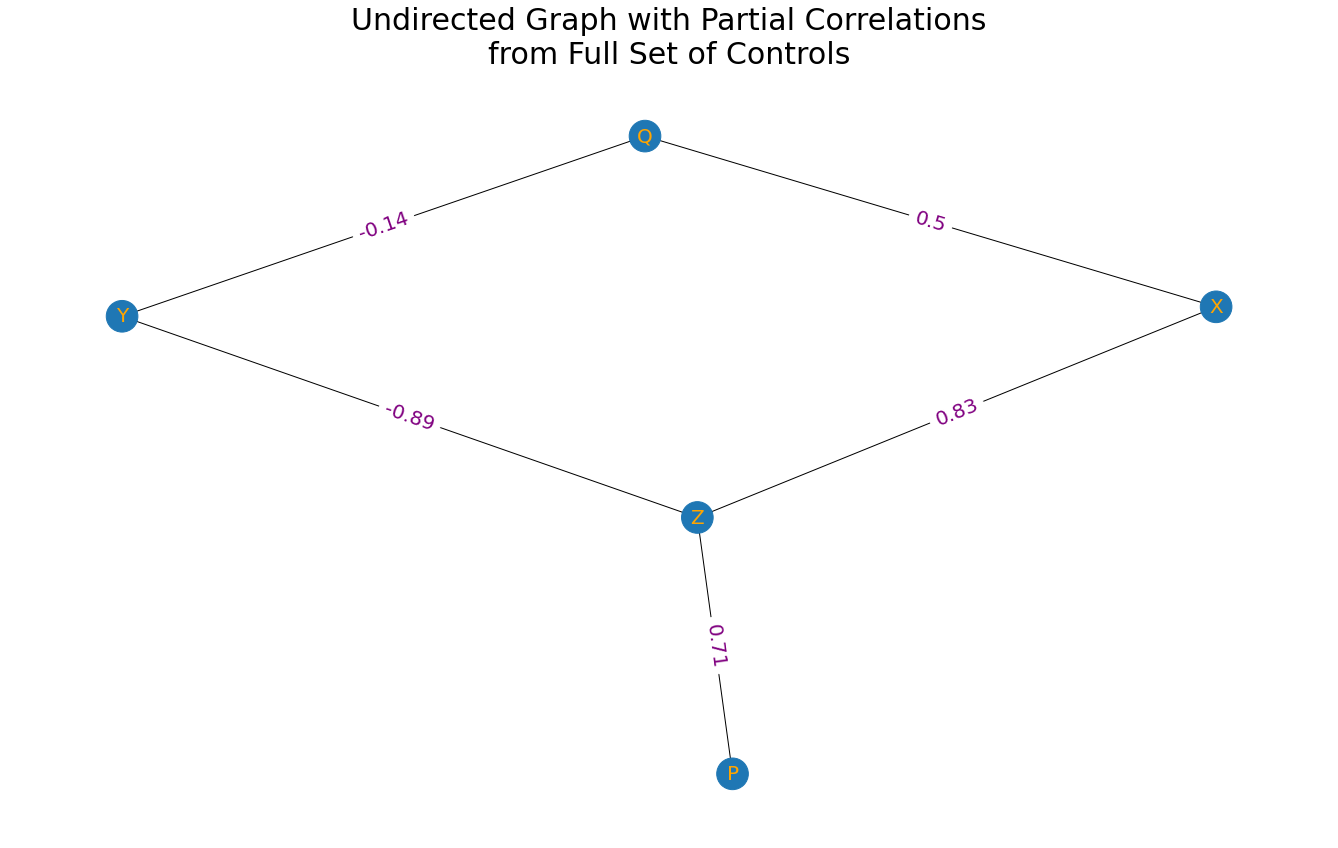

In [15]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

In [16]:
import networkx
print(networkx.__version__)

2.6.3


In [18]:
!pip install -U pgmpy

In [19]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2


model = c.estimate(return_type = "dag",
                   variant= "parallel",
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars,
                   ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('Y', 'Z'), ('X', 'Z'), ('P', 'Z'), ('Q', 'X'), ('Q', 'Y')])

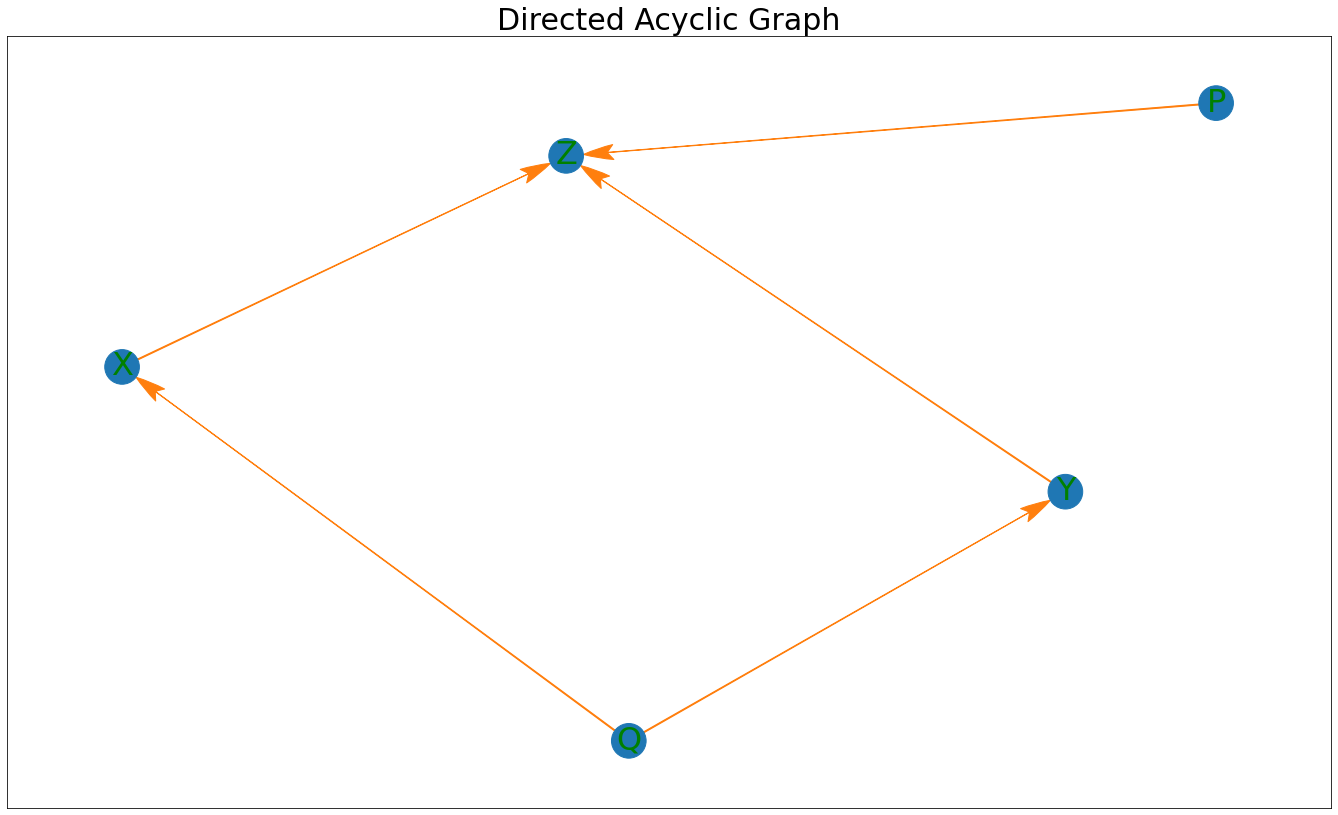

In [20]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                     pos, node_color=color_map,
                     node_size = 1200,
                     with_labels=True,
                     arrows=True,
                     font_color = "green",
                     font_size = 32,
                     alpha = 1,
                     width = 1,
                     edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, df, title = "Directed Acyclic Graph")
edges

keep control: X
keep control: P
('Y', 'Z') ['X', 'P']
keep control: Y
keep control: P
('X', 'Z') ['Y', 'P']
keep control: Y
keep control: X
('P', 'Z') ['Y', 'X']
('Q', 'X') []
('Q', 'Y') []


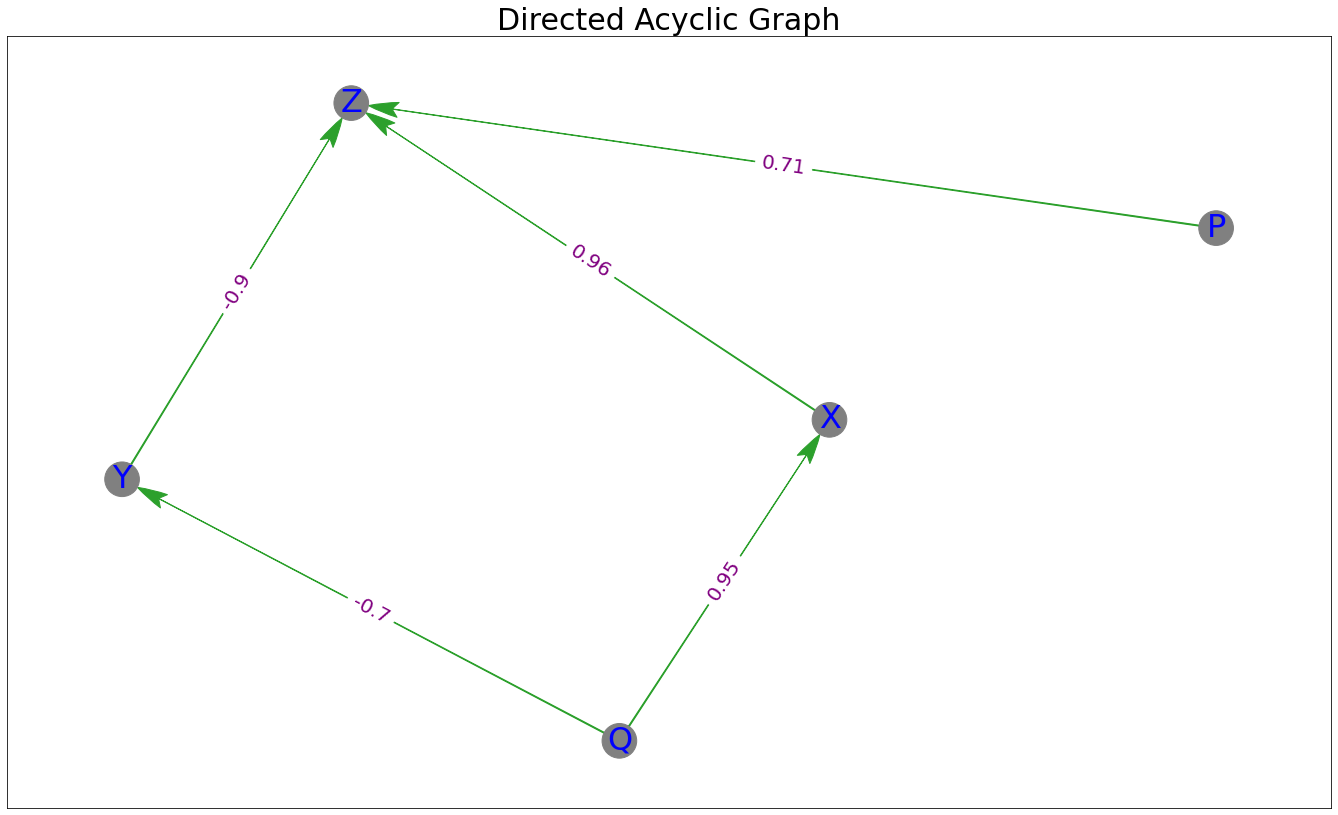

In [21]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos,
                     node_color=color_map,
                     node_size = 1200,
                     with_labels=True,
                     arrows=True,
                     font_color = "blue",
                     font_size = 32,
                     alpha = 1,
                     width = 1,
                     edge_color = "C2",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels=edge_labels,
                                font_color='purple',
                                font_size=20)

graph_DAG(edges, df, title = "Directed Acyclic Graph")